# SQL - Intermediate to Advanced

In this lab, we will explore advanced SQL commands using our Jupyter notebook using Google Colab.

**Objectives**
- Review of Common SQL Commands for Filtering Data
  - Select Distict, Where, Limit, Between, In, Like, Between, In, Like, Case Statements
- Set operators
  - Union, Except, Intersect
- Managing Data
  - Subqueries
  - Views
  - Common Table Expressions (CTE)
- Transactions
- Indexes
- Triggers

**Reference**
- Sqlite Tutorial - https://www.sqlitetutorial.net/

## Database setup

In the setup, we will install ipython-sql, sqlalchemy, and create our database.

In [47]:
# to hide output of this cell
%%capture

!pip install ipython-sql
!pip install databases
!pip install databases[sqlite]

# Create the database
import sqlalchemy
%load_ext sql
%sql sqlite:///projectdb.db



In [48]:
# Lets importor the salaries CSV into our project databases.
# In this case, we will use Pandas and sqlalchemy create_engine to move the data.

import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///projectdb.db', echo=True)
sqlite_connection = engine.connect()

# Read the salaries CSV in our project library
# Note: every file that is part of the project folder is linked to the github path
salaries_df = pd.read_csv("https://raw.githubusercontent.com/beneze/Datasets/master/SFSalaries2011_2014.csv")
salaries_df


2020-08-02 00:21:28,453 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-08-02 00:21:28,454 INFO sqlalchemy.engine.base.Engine ()
2020-08-02 00:21:28,457 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-08-02 00:21:28,458 INFO sqlalchemy.engine.base.Engine ()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [49]:
table_name = 'salaries_data'
%sql DROP TABLE IF EXISTS salaries_data
salaries_df.to_sql(
    table_name,
    sqlite_connection
)

 * sqlite:///projectdb.db
Done.
2020-08-02 00:22:30,130 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("salaries_data")
2020-08-02 00:22:30,139 INFO sqlalchemy.engine.base.Engine ()
2020-08-02 00:22:30,147 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("salaries_data")
2020-08-02 00:22:30,153 INFO sqlalchemy.engine.base.Engine ()
2020-08-02 00:22:30,162 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE salaries_data (
	"index" BIGINT, 
	"Id" BIGINT, 
	"EmployeeName" TEXT, 
	"JobTitle" TEXT, 
	"BasePay" TEXT, 
	"OvertimePay" TEXT, 
	"OtherPay" TEXT, 
	"Benefits" TEXT, 
	"TotalPay" FLOAT, 
	"TotalPayBenefits" FLOAT, 
	"Year" BIGINT, 
	"Notes" FLOAT, 
	"Agency" TEXT, 
	"Status" TEXT
)


2020-08-02 00:22:30,168 INFO sqlalchemy.engine.base.Engine ()
2020-08-02 00:22:30,190 INFO sqlalchemy.engine.base.Engine COMMIT
2020-08-02 00:22:30,192 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_salaries_data_index ON salaries_data ("index")
2020-08-02 00:22:30,193 INFO sqlalch

In [50]:
# Verify that the import worked as expected.
%%sql

SELECT COUNT(1) As No_Of_Records
FROM salaries_data;


 * sqlite:///projectdb.db
Done.


No_Of_Records
148654


In [51]:
# We then populate our database with more tables built from our relational model from Lab 3.
# These tables are also initialized with data

%%sql

DROP TABLE IF EXISTS [Position];
CREATE TABLE [Position] (
  [id] INTEGER PRIMARY KEY,
  [position] nvarchar(250) NOT NULL,
  [active] boolean boolean DEFAULT 1
);

DROP TABLE IF EXISTS [Activity];
CREATE TABLE [Activity] (
  [id] INTEGER PRIMARY KEY,
  [activity] nvarchar(250) NOT NULL,
  [active] boolean boolean DEFAULT 1
);

DROP TABLE IF EXISTS [Address];
CREATE TABLE [Address] (
  [id] INTEGER PRIMARY KEY,
  [street_number] nvarchar(250),
  [street_name] nvarchar(250) NOT NULL,
  [zip_code] nvarchar(20),
  [city] nvarchar(250) NOT NULL,
  [state] nvarchar(200) NOT NULL,
  [country] nvarchar(250)
);


DROP TABLE IF EXISTS [WorkProject];
CREATE TABLE [WorkProject] (
  [id] INTEGER PRIMARY KEY,
  [project_name] nvarchar(250) NOT NULL,
  [address_id] [int],
  [date_created] datetime NOT NULL,
  FOREIGN KEY ([address_id]) REFERENCES [Address] ([id])
      ON DELETE SET NULL
);


DROP TABLE IF EXISTS [Employee];
CREATE TABLE [Employee] (
  [id] INTEGER PRIMARY KEY,
  [surname] nvarchar(250) NOT NULL,
  [firstname] nvarchar(250) NOT NULL,  
  [middlename] varchar(250),
  [date_of_birth] date NOT NULL,
  [active] boolean DEFAULT 1
);


DROP TABLE IF EXISTS [EmployeePosition];
CREATE TABLE [EmployeePosition]  (
  [id] INTEGER PRIMARY KEY,
  [employee_id] int,
  [position_id] int,
  [charge_per_hour] float,
  [start_date] datetime NOT NULL,
  [end_date] datetime, 
  FOREIGN KEY ([employee_id]) REFERENCES [Employee] ([id]) ON DELETE SET NULL,
  FOREIGN KEY ([position_id]) REFERENCES [Position] ([id]) ON DELETE SET NULL
);


DROP TABLE IF EXISTS [EmployeeProjectActivity];
CREATE TABLE [EmployeeProjectActivity] (
  [id] INTEGER PRIMARY KEY,
  [employee_position_id] int,
  [project_id] int,
  [activity_id] int,
  [activity_date] datetime NOT NULL,
  [hours_billed] float4,
  FOREIGN KEY ([project_id]) REFERENCES [WorkProject] ([id]) ON DELETE SET NULL
  FOREIGN KEY ([employee_position_id]) REFERENCES [EmployeePosition] ([id]) ON DELETE SET NULL
);

DROP TABLE IF EXISTS [EmployeeAddress];
CREATE TABLE [EmployeeAddress] (
  [employee_id] int,
  [address_id] int,
  [start_date] datetime NOT NULL,
  [end_date] datetime NULL,
  PRIMARY KEY ([employee_id], [address_id]),
  FOREIGN KEY ([employee_id]) REFERENCES [Employee] ([id]) ON DELETE SET NULL
);

/** Push the setup dataset**/
INSERT INTO Position([position]) VALUES ('Elec. Engineer');
INSERT INTO Position([position]) VALUES ('Database Designer');
INSERT INTO Position([position]) VALUES ('Programmer');
INSERT INTO Position([position]) VALUES ('Systems Analyst');
INSERT INTO Position([position]) VALUES ('Applications Designer');
INSERT INTO Position([position]) VALUES ('General Support');
INSERT INTO Position([position]) VALUES ('DSS Analyst');
INSERT INTO Position([position]) VALUES ('Clerical Support');

INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('2A', 'Lincoln Ave.', '96522', 'Mankato', 'Mississippi', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('Theodore Lowe', 'Ap #867-859 Sit Rd.', '39531', 'Azusa', 'New York', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('313', 'Pellentesque Ave', '43526', 'Mankato', 'Hawaii', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('987-4223', 'LUrna St.', '96522', 'Savannah ', 'Illinois', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('Ap #784-1887', 'Lobortis Ave', '31522', 'Cudahy', 'Ohio', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('3714', 'Nascetur St', '10626', 'Hawthorne', 'Louisiana', 'USA');

INSERT INTO WorkProject([project_name],[address_id],[date_created]) VALUES ('Evergreen', 2, date());
INSERT INTO WorkProject([project_name],[address_id],[date_created]) VALUES ('Amber Wave', 3, date());
INSERT INTO WorkProject([project_name],[address_id],[date_created]) VALUES ('Rolling Table', 2, date());
INSERT INTO WorkProject([project_name],[address_id],[date_created]) VALUES ('Starflight', 5, date());

/* Employee data */
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Arbough', 'Earl', 'June', '1998-03-10');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('News', 'Gerald', 'John', '1965-03-10');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Johnson', 'Karen', 'Alice', '1980-04-03');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Smithfield', '', 'William', '1968-09-17');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Senior', 'Harold', 'David', '1975-06-14');

INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Annelise', '', 'Jones', '1970-04-20');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Frommer', 'John', 'James', '1997-06-12');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Ramoras', 'Katie', 'Anne', '1985-01-23');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Smithson', 'Mary', 'David', '1960-05-04');

INSERT INTO Activity([activity]) VALUES ('Weekly Project Meeting');
INSERT INTO Activity([activity]) VALUES ('Requirements Gathering');
INSERT INTO Activity([activity]) VALUES ('Inventory Analysis');
INSERT INTO Activity([activity]) VALUES ('Inventory Validation');
INSERT INTO Activity([activity]) VALUES ('Weekly Project Meeting');
INSERT INTO Activity([activity]) VALUES ('Instrument Repairs');
INSERT INTO Activity([activity]) VALUES ('Design Specifications');
INSERT INTO Activity([activity]) VALUES ('Troubleshooting');
INSERT INTO Activity([activity]) VALUES ('DB Modeling');
INSERT INTO Activity([activity]) VALUES ('Reporting');
INSERT INTO Activity([activity]) VALUES ('Query Generation');
INSERT INTO Activity([activity]) VALUES ('Software Maintenance');
INSERT INTO Activity([activity]) VALUES ('Building mockups');

INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (1, 2,  85.5, '2015-01-01');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (2, 2,  105.5, '2019-03-20');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (3, 3,  37.5, '2017-04-04');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (4, 4,  96.5, '2018-10-13');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (5, 5,  26.5, '2019-09-05');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (6, 2,  85.5, '2012-02-03');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (7, 3,  50.5, '2014-05-01');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (8, 4,  65.5, '2016-03-04');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (9, 2,  85.5, '2017-04-03');

/* Employee hourly billed activities */
INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 1, 1, '2020-11-02', 21.50);
INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 2, 2, '2020-11-03', 12.50);
INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 3, 3, '2020-11-04', 44.75);

/* Employee addresses */
INSERT INTO EmployeeAddress([employee_id], [address_id], [start_date]) VALUES (1, 1, '2017-01-02');
INSERT INTO EmployeeAddress([employee_id], [address_id], [start_date]) VALUES (1, 3, '2018-04-03');
INSERT INTO EmployeeAddress([employee_id], [address_id], [start_date]) VALUES (1, 5, '2019-09-04');


 * sqlite:///projectdb.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 ro

[]

### Creating Views

Views allow us to create an abstract table on top of complex queries. It is common that we have complex queries that become the base of various data elements we need for subsequent analysis. 

For example, from our relational database, we can create the employee position and project summary views.

In [52]:
# Create the view as needed.
# To ensure that our notebook don't trigger unnecessary as it gets re-run, we drop the view if it already exists.

%%sql

/* View of employee position details */
DROP VIEW IF EXISTS vwEmployeePosition;
CREATE VIEW IF NOT EXISTS vwEmployeePosition
AS
SELECT e.id
  , e.employee_id
  , UPPER(emp.surname) || ' ' || emp.firstname || ' ' || SUBSTR(emp.middlename, 1, 1) as employee_name
  , strftime('%Y',date()) - strftime('%Y', emp.date_of_birth) As age
  , p.position   As Job  
  , e.charge_per_hour
FROM EmployeePosition e
INNER JOIN Employee emp ON e.employee_id = emp.id
INNER JOIN Position p ON e.position_id = p.id
;

/* A view of the project summary details */
DROP VIEW IF EXISTS vwProjectSummary;
CREATE VIEW IF NOT EXISTS vwProjectSummary
AS
SELECT pa.id
, p.project_name
, UPPER(emp.surname) || ' ' || emp.firstname || ' ' || SUBSTR(emp.middlename, 1, 1) as employee_name
, pos.position
, strftime('%Y',date()) - strftime('%Y', emp.date_of_birth) As age
, a.activity
, pa.activity_date
, ep.charge_per_hour
, pa.hours_billed
, ad.street_number || ' ' || ad.street_name || ' ' || ad.city || ' ' || ad.zip_code || ', ' || ad.state As address_summary
, ep.charge_per_hour * pa.hours_billed AS total_charge
FROM EmployeeProjectActivity pa
LEFT JOIN EmployeePosition ep ON ep.id = pa.employee_position_id
INNER JOIN Employee emp ON ep.employee_id = emp.id
LEFT JOIN WorkProject p ON p.id = pa.project_id 
LEFT JOIN Activity a ON a.id = pa.activity_id
LEFT JOIN Position pos ON ep.position_id = pos.id
LEFT JOIN Address ad ON p.address_id = ad.id
;

/* A view of the salary strata for the employees */
DROP VIEW IF EXISTS vwEmployeeSalaries;
CREATE VIEW IF NOT EXISTS vwEmployeeSalaries
AS
SELECT EmployeeName, CASE WHEN TotalPay < 100000 THEN 'Less than 100k'
            WHEN TotalPay BETWEEN 100000 AND 149999 THEN '[100k - 150k]'
            WHEN TotalPay BETWEEN 150000 AND 199999 THEN '[150k - 200k]'
            WHEN TotalPay BETWEEN 200000 AND 249999 THEN '[200k - 250k]'
            WHEN TotalPay >= 250000 THEN 'Over 250k'
            END As PayCategories
            , TotalPay
FROM salaries_data
;


 * sqlite:///projectdb.db
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [53]:
# We can verify this view through a simple query as if it's a traditional table.
%%sql

SELECT *
FROM vwEmployeePosition
;

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
1,1,ARBOUGH June E,22,Database Designer,85.5
2,2,NEWS John G,55,Database Designer,105.5
3,3,JOHNSON Alice K,40,Programmer,37.5
4,4,SMITHFIELD William,52,Systems Analyst,96.5
5,5,SENIOR David H,45,Applications Designer,26.5
6,6,ANNELISE Jones,50,Database Designer,85.5
7,7,FROMMER James J,23,Programmer,50.5
8,8,RAMORAS Anne K,35,Systems Analyst,65.5
9,9,SMITHSON David M,60,Database Designer,85.5


In [54]:
%%sql

SELECT *
FROM vwProjectSummary;


 * sqlite:///projectdb.db
Done.


id,project_name,employee_name,position,age,activity,activity_date,charge_per_hour,hours_billed,address_summary,total_charge
1,Evergreen,ARBOUGH June E,Database Designer,22,Weekly Project Meeting,2020-11-02,85.5,21.5,"Theodore Lowe Ap #867-859 Sit Rd. Azusa 39531, New York",1838.25
2,Evergreen,NEWS John G,Database Designer,55,Requirements Gathering,2020-11-03,105.5,12.5,"Theodore Lowe Ap #867-859 Sit Rd. Azusa 39531, New York",1318.75
3,Evergreen,JOHNSON Alice K,Programmer,40,Inventory Analysis,2020-11-04,37.5,44.75,"Theodore Lowe Ap #867-859 Sit Rd. Azusa 39531, New York",1678.125


In [55]:
%%sql 

SELECT *
FROM vwEmployeeSalaries
LIMIT 10
;

 * sqlite:///projectdb.db
Done.


EmployeeName,PayCategories,TotalPay
NATHANIEL FORD,Over 250k,567595.43
GARY JIMENEZ,Over 250k,538909.28
ALBERT PARDINI,Over 250k,335279.91
CHRISTOPHER CHONG,Over 250k,332343.61
PATRICK GARDNER,Over 250k,326373.19
DAVID SULLIVAN,Over 250k,316285.74
ALSON LEE,Over 250k,315981.05
DAVID KUSHNER,Over 250k,307899.46
MICHAEL MORRIS,Over 250k,303427.55
JOANNE HAYES-WHITE,Over 250k,302377.73


In [56]:
%%sql

SELECT COUNT(1) As NoRecords
FROM vwEmployeeSalaries
;

 * sqlite:///projectdb.db
Done.


NoRecords
148654


### Review of Common SQL Commands for Filtering Data

- Select Distinct
- Where
- Limit
- Between
- In
- Like
- Case Statements

In [57]:
# SELECT DISTINCT
%%sql

SELECT Job
FROM vwEmployeePosition;

 * sqlite:///projectdb.db
Done.


Job
Database Designer
Database Designer
Programmer
Systems Analyst
Applications Designer
Database Designer
Programmer
Systems Analyst
Database Designer


In [58]:
%%sql

SELECT Distinct Job
FROM vwEmployeePosition;

 * sqlite:///projectdb.db
Done.


Job
Database Designer
Programmer
Systems Analyst
Applications Designer


In [59]:
# WHERE Clauses (Direct filtering)
%%sql

SELECT *
FROM vwEmployeePosition
WHERE Job = 'Database Designer';

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
1,1,ARBOUGH June E,22,Database Designer,85.5
2,2,NEWS John G,55,Database Designer,105.5
6,6,ANNELISE Jones,50,Database Designer,85.5
9,9,SMITHSON David M,60,Database Designer,85.5


In [60]:
# WHERE Clause with LIKE filters using wildcards
%%sql

SELECT *
FROM vwEmployeePosition
WHERE Job LIKE '%Designer%'

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
1,1,ARBOUGH June E,22,Database Designer,85.5
2,2,NEWS John G,55,Database Designer,105.5
5,5,SENIOR David H,45,Applications Designer,26.5
6,6,ANNELISE Jones,50,Database Designer,85.5
9,9,SMITHSON David M,60,Database Designer,85.5


In [61]:
# WHERE Clause with LIKE filters using wildcards
%%sql

SELECT DISTINCT JobTitle
FROM salaries_data
WHERE JobTitle LIKE '%Director%' OR JobTitle LIKE '%Head%' OR JobTitle LIKE '%Manager%'
;

 * sqlite:///projectdb.db
Done.


JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
DEPUTY DIRECTOR OF INVESTMENTS
DEPARTMENT HEAD V
PORT DIRECTOR
MANAGER VII
MANAGER VIII
DEPUTY DIRECTOR II - MUNICIPAL TRANSPORTATION AG
DEPUTY DIRECTOR V
DEPARTMENT HEAD IV
NURSE MANAGER


In [62]:
%%sql

SELECT COUNT(1) As Matches
FROM salaries_data
WHERE JobTitle LIKE '%Director%' OR JobTitle LIKE '%Head%' OR JobTitle LIKE '%Manager%'
;


 * sqlite:///projectdb.db
Done.


Matches
4896


In [63]:
# WHERE Clause with IN operator
%%sql

SELECT *
FROM vwEmployeePosition
WHERE Job IN ('Database Designer', 'Systems Analyst');

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
1,1,ARBOUGH June E,22,Database Designer,85.5
2,2,NEWS John G,55,Database Designer,105.5
4,4,SMITHFIELD William,52,Systems Analyst,96.5
6,6,ANNELISE Jones,50,Database Designer,85.5
8,8,RAMORAS Anne K,35,Systems Analyst,65.5
9,9,SMITHSON David M,60,Database Designer,85.5


In [64]:
# WHERE clause wth logical operators
%%sql

SELECT *
FROM vwEmployeePosition
WHERE age BETWEEN 40.00 AND 50.0;

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
3,3,JOHNSON Alice K,40,Programmer,37.5
5,5,SENIOR David H,45,Applications Designer,26.5
6,6,ANNELISE Jones,50,Database Designer,85.5


In [65]:
# WHERE clause with operations =, >, >=, <, <=, <>
%%sql

SELECT *
FROM vwEmployeePosition
WHERE charge_per_hour  > 89.9;

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
2,2,NEWS John G,55,Database Designer,105.5
4,4,SMITHFIELD William,52,Systems Analyst,96.5


In [66]:
# USE LIMIT row_count to limit the data we can pull from large tables or for special conditions
%%sql

SELECT *
FROM salaries_data
LIMIT 20;

 * sqlite:///projectdb.db
Done.


index,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,None,567595.43,567595.43,2011,None,San Francisco,None
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,None,538909.28,538909.28,2011,None,San Francisco,None
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,None,335279.91,335279.91,2011,None,San Francisco,None
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,None,332343.61,332343.61,2011,None,San Francisco,None
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,None,326373.19,326373.19,2011,None,San Francisco,None
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,None,316285.74,316285.74,2011,None,San Francisco,None
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,None,315981.05,315981.05,2011,None,San Francisco,None
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,None,307899.46,307899.46,2011,None,San Francisco,None
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,None,303427.55,303427.55,2011,None,San Francisco,None
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,None,302377.73,302377.73,2011,None,San Francisco,None


In [67]:
# Getting GROUPing of set categories.
# Popular aggregates are SUM, AVG, MIN, MAX, COUNT

%%sql

SELECT Job, COUNT(*) As [No. of Positions]
FROM vwEmployeePosition
GROUP BY Job
;

 * sqlite:///projectdb.db
Done.


Job,No. of Positions
Applications Designer,1
Database Designer,4
Programmer,2
Systems Analyst,2


In [69]:
%%sql

SELECT JobTitle, COUNT(Distinct EmployeeName) As [Matching Employees]
FROM salaries_data
GROUP BY JobTitle
ORDER BY [Matching Employees] DESC
LIMIT 20;

 * sqlite:///projectdb.db
Done.


JobTitle,Matching Employees
Transit Operator,5024
Special Nurse,3154
Registered Nurse,2648
TRANSIT OPERATOR,2366
Public Svc Aide-Public Works,2305
Police Officer 3,1761
Custodian,1693
Firefighter,1662
Recreation Leader,1530
Patient Care Assistant,1416


In [72]:
# Find the top year in terms of the number of employees.
%%sql

SELECT Year, COUNT(DISTINCT [EmployeeName]) As EmployeeCount
FROM salaries_data
GROUP BY Year
ORDER BY EmployeeCount DESC
LIMIT 1;

 * sqlite:///projectdb.db
Done.


Year,EmployeeCount
2014,36684


In [74]:
# COUNTing categories.
%%sql

SELECT PayCategories, COUNT(*) AS ApplicableEmployees, AVG(TotalPay) As AveragePay
FROM vwEmployeeSalaries
GROUP BY PayCategories
ORDER BY COUNT(*) DESC;


 * sqlite:///projectdb.db
Done.


PayCategories,ApplicableEmployees,AveragePay
Less than 100k,106686,49836.50050213293
[100k - 150k],29997,121809.42391372976
[150k - 200k],9963,169658.2684623094
[200k - 250k],1717,216326.7432964471
Over 250k,291,282122.35649484524


### Sub-queries
These are queries that emded inside a parent query. In the example below, we are pulling the categories and subsequently used to calculate the average pay for each employee.

In [75]:
%%sql

SELECT PayCategories, COUNT(*) AS ApplicableEmployees, AVG(TotalPay) As AveragePay
FROM (
    SELECT EmployeeName, CASE WHEN TotalPay < 100000 THEN 'Less than 100k'
            WHEN TotalPay BETWEEN 100000 AND 149999 THEN '[100k - 150k]'
            WHEN TotalPay BETWEEN 150000 AND 199999 THEN '[150k - 200k]'
            WHEN TotalPay BETWEEN 200000 AND 249999 THEN '[200k - 250k]'
            WHEN TotalPay >= 250000 THEN 'Over 250k'
            END As PayCategories
            , TotalPay
    FROM salaries_data
) D
GROUP BY PayCategories
ORDER BY COUNT(*) DESC;



 * sqlite:///projectdb.db
Done.


PayCategories,ApplicableEmployees,AveragePay
Less than 100k,106686,49836.50050213293
[100k - 150k],29997,121809.42391372976
[150k - 200k],9963,169658.2684623094
[200k - 250k],1717,216326.7432964471
Over 250k,291,282122.35649484524


In [76]:
# Let's assume we are looking at employees in the salaries dataset that were directors in 2013 but no longer directors in 2014
# Let's use a sub-query to address this as a usecase
# First, we create a query that pulls those are not directors in 2014

%%sql

SELECT COUNT(1) As Matches
FROM salaries_data
WHERE JobTitle NOT LIKE '%Director%' AND Year=2014
AND EmployeeName NOT IN (
    SELECT EmployeeName
    FROM salaries_data
    WHERE JobTitle LIKE '%Director%' AND Year=2013
)

 * sqlite:///projectdb.db
Done.


Matches
38053


### Common Table expression

There are times that we need to build a hierarchy of dataset relationshsip in one query. CTEs come in handy for those adhoc views.

In [77]:
%%sql

WITH PayCategorySummary AS 
(
    SELECT EmployeeName, CASE WHEN TotalPay < 100000 THEN 'Less than 100k'
            WHEN TotalPay BETWEEN 100000 AND 149999 THEN '[100k - 150k]'
            WHEN TotalPay BETWEEN 150000 AND 199999 THEN '[150k - 200k]'
            WHEN TotalPay BETWEEN 200000 AND 249999 THEN '[200k - 250k]'
            WHEN TotalPay >= 250000 THEN 'Over 250k'
            END As PayCategory
            , TotalPay
    FROM salaries_data    
),
AveragePaySummary AS (
    SELECT PayCategory, COUNT(*) AS ApplicableEmployees, AVG(TotalPay) As AveragePay
    FROM PayCategorySummary
    GROUP BY PayCategory
    ORDER BY COUNT(*) DESC
)

SELECT pc.EmployeeName, pc.PayCategory, pc.TotalPay, aps.AveragePay
FROM PayCategorySummary pc
JOIN AveragePaySummary aps ON pc.PayCategory = aps.PayCategory
ORDER BY aps.AveragePay DESC
LIMIT 10
;

 * sqlite:///projectdb.db
Done.


EmployeeName,PayCategory,TotalPay,AveragePay
NATHANIEL FORD,Over 250k,567595.43,282122.35649484524
GARY JIMENEZ,Over 250k,538909.28,282122.35649484524
ALBERT PARDINI,Over 250k,335279.91,282122.35649484524
CHRISTOPHER CHONG,Over 250k,332343.61,282122.35649484524
PATRICK GARDNER,Over 250k,326373.19,282122.35649484524
DAVID SULLIVAN,Over 250k,316285.74,282122.35649484524
ALSON LEE,Over 250k,315981.05,282122.35649484524
DAVID KUSHNER,Over 250k,307899.46,282122.35649484524
MICHAEL MORRIS,Over 250k,303427.55,282122.35649484524
JOANNE HAYES-WHITE,Over 250k,302377.73,282122.35649484524


In [79]:
# Let us go back and build the right query using CTEs that actually tells us those that were directors in 2013 and no longer directors in 2014.
%%sql

WITH Directors_2013 
AS
(
    SELECT EmployeeName
    FROM salaries_data
    WHERE JobTitle LIKE '%Director%' AND Year=2013  
),
Directors_2014_Not_In_2014 AS
(
    SELECT s.EmployeeName
    FROM salaries_data s 
    JOIN Directors_2013 d ON s.EmployeeName = d.EmployeeName
    WHERE s.JobTitle NOT LIKE '%Director%' AND s.Year=2014 
)

SELECT *
FROM Directors_2014_Not_In_2014

 * sqlite:///projectdb.db
Done.


EmployeeName
Jeff F Pera
Michael J Lee
Tiffany M Rasso
Dennis M Doyle


### Set Operations (Union, Except, Intersect)

In [80]:
%%sql

WITH Size AS (SELECT COUNT(1) As Records FROM salaries_data),
PayCategorySummary AS 
(
    SELECT EmployeeName
      , Agency
      , Year
      , Status
      , CASE WHEN TotalPay < 100000 THEN '[Less than 100k]'
            WHEN TotalPay BETWEEN 100000 AND 149999 THEN '[100k - 150k]'
            WHEN TotalPay BETWEEN 150000 AND 199999 THEN '[150k - 200k]'
            WHEN TotalPay BETWEEN 200000 AND 249999 THEN '[200k - 250k]'
            WHEN TotalPay >= 250000 THEN '[Over 250k]'
            END As PayCategories
            , TotalPay
    FROM salaries_data    
)

SELECT PayCategories As Category
  , 'Pay-Scale' As Type
  , CAST(COUNT(*) AS FLOAT)/CAST(Size.Records AS FLOAT) * 100.0 AS PercentageOfEmployees
  , AVG(TotalPay) As AveragePay
FROM PayCategorySummary, Size
GROUP BY PayCategories

UNION

SELECT Agency
  , 'Agency'
  , CAST(COUNT(*) AS FLOAT)/CAST(Size.Records AS FLOAT) * 100.0 AS ApplicableEmployees
  , AVG(TotalPay) As AveragePay
FROM PayCategorySummary, Size
GROUP BY Agency

UNION

SELECT CAST(Year AS VARCHAR(4))
  , 'Year'
  , CAST(COUNT(*) AS FLOAT)/CAST(Size.Records AS FLOAT) * 100.0 AS ApplicableEmployees
  , AVG(TotalPay) As AveragePay
FROM PayCategorySummary, Size
GROUP BY Year

UNION

SELECT Status
  , 'Status'
  , CAST(COUNT(*) AS FLOAT)/CAST(Size.Records AS FLOAT) * 100.0 AS ApplicableEmployees
  , AVG(TotalPay) As AveragePay
FROM PayCategorySummary, Size
GROUP BY Status

ORDER BY Type

;

 * sqlite:///projectdb.db
Done.


Category,Type,PercentageOfEmployees,AveragePay
San Francisco,Agency,100.0,74768.321971703
[100k - 150k],Pay-Scale,20.17907355335208,121809.42391372976
[150k - 200k],Pay-Scale,6.702140541122338,169658.2684623094
[200k - 250k],Pay-Scale,1.155031146151466,216326.7432964471
[Less than 100k],Pay-Scale,71.7679981702477,49836.50050213293
[Over 250k],Pay-Scale,0.19575658912642782,282122.35649484524
None,Status,74.35723223054879,74525.70844638161
FT,Status,15.024150039689479,103505.76105265277
PT,Status,10.618617729761729,35806.98662717769
2011,Year,24.324269780833344,71744.10387123664


**Intersect**

Provides the intersection of two collections.

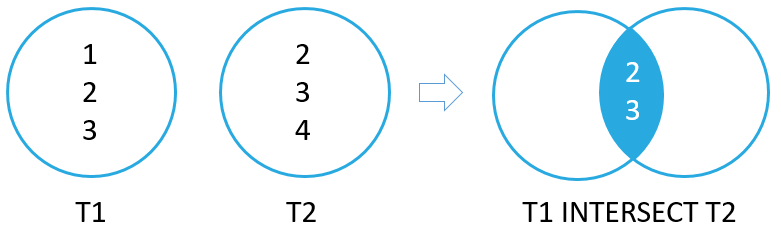

**Source**: https://www.sqlitetutorial.net/sqlite-intersect/

In [81]:
# SQLITE INTERSECT
# To illustrate it, let us find out the top 10 employees that earn more than 200k with benefits
# To achieve this, we create two sets - 1) Those that earn more than 200k 2) Those that have benefits. 3) Pick up intersecting records 3) Limit the results to the top 10.
# Please note that this can be achieved using a WHERE clause as well
%%sql

SELECT d.EmployeeName, AVG(s.TotalPay) As AveragePay
FROM
(
    SELECT EmployeeName
    FROM salaries_data
    WHERE TotalPay > 200000

    INTERSECT

    SELECT EmployeeName
    FROM salaries_data
    WHERE Benefits <> 'None'
) d
INNER JOIN salaries_data s ON s.EmployeeName = d.EmployeeName
GROUP BY d.EmployeeName
ORDER BY AveragePay DESC
LIMIT 10
;


 * sqlite:///projectdb.db
Done.


EmployeeName,AveragePay
David Shinn,373849.97
Gary Altenberg,362844.66
John Goldberg,350403.41
Samson Lai,347102.32
Amy P Hart,346890.565
Ellen G Moffatt,339862.71
William J Coaker Jr.,339653.7
Khoa Trinh,336393.73
Gregory P Suhr,332999.41500000004
Joanne M Hayes-White,331577.725


**EXCEPT Construct**
Sometimes we want to exclude a specific collection from our set. Using our salaries, we can run the exact same query but exclude those that are paid overtime.

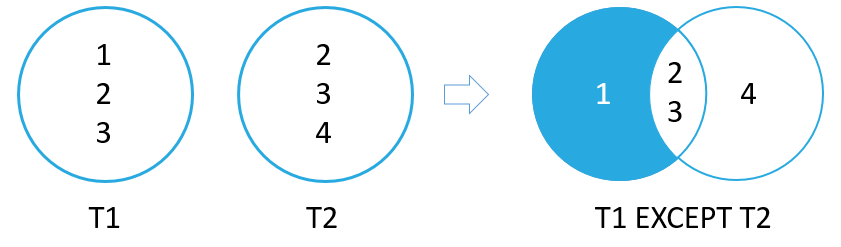

Source: https://www.sqlitetutorial.net/sqlite-except/

In [82]:
%%sql


    /** Pick those receive over 200k annually. **/
    SELECT EmployeeName
    FROM salaries_data
    WHERE TotalPay > 200000

    EXCEPT

    /** Exclude those that have benefits **/
    SELECT EmployeeName
    FROM salaries_data
    WHERE Benefits <> 'None'
    LIMIT 10;

 * sqlite:///projectdb.db
Done.


EmployeeName
AI-KYUNG CHUNG
ALAN HARVEY
ALBERT PARDINI
ALBERTO PEDRUCO
ALEXANDER CHEN
ALSON LEE
AMPARO RODRIGUEZ
AMY HART
ANA SAMPERA
ANDREW LOGAN


## Transactions
Relational databases provide ACID Properties. These are:
- **A**tomicity : Entire transaction must be committed or rolled back
- **C**onsistency: A transaction cannot leave the database in an inconsistent state
- **I**solation: Transactions from multiple database sessions will not intefere with each other
- **D**urability: Transactions are permanent if even there is a complete outage event such as power failure, application crash.

These ensure accuracy, and full data integrity to all transactions.

Transactions are a set of data definition queries (INSERT, UPDATE, and DELETE) that either get COMMITed if they all execute successfully or ROLLed BACK if any of the queries fail.

Structure

BEGIN TRANSACTION;

# On or more queries

COMMIT;

# If there is a failure...

ROLLBACK;

In [83]:
# First let's add a new activity to the Activity table.
%%sql

INSERT INTO Activity([activity]) VALUES ('Python Programming');
SELECT MAX(id) FROM Activity;


 * sqlite:///projectdb.db
1 rows affected.
Done.


MAX(id)
14


In [84]:
# We can then proceed to add this activity for some employees on the same project.

%%sql

BEGIN TRANSACTION;

INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 3, 14, '2018-11-02', 21.50);
INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 5, 14, '2018-11-03', 12.50);
INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 8, 14, '2018-11-04', 44.75);

COMMIT;


 * sqlite:///projectdb.db


Exception: ignored

### INDEXES
Query performance is important with relational databases. If a query is well written, it can excute up 5x faster than a poorly written query. 

Indexes provide the mechanim for increasing query performance. Through indexes, value looks up used with JOINs in queries. 

**Types of Indexes supported by SQLite**

1. Unique Index
2. Non-unique indexes 

In [85]:
%%sql

PRAGMA table_info('salaries_data');

 * sqlite:///projectdb.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,Id,BIGINT,0,None,0
2,EmployeeName,TEXT,0,None,0
3,JobTitle,TEXT,0,None,0
4,BasePay,TEXT,0,None,0
5,OvertimePay,TEXT,0,None,0
6,OtherPay,TEXT,0,None,0
7,Benefits,TEXT,0,None,0
8,TotalPay,FLOAT,0,None,0
9,TotalPayBenefits,FLOAT,0,None,0


In [87]:
%%sql

PRAGMA index_list('EmployeeProjectActivity');

 * sqlite:///projectdb.db
Done.


seq,name,unique,origin,partial


In [88]:
%%sql

PRAGMA index_list('salaries_data');

 * sqlite:///projectdb.db
Done.


seq,name,unique,origin,partial
0,ix_salaries_data_index,0,c,0


In [89]:
%%sql

PRAGMA index_info('ix_salaries_data_index');

 * sqlite:///projectdb.db
Done.


seqno,cid,name
0,0,index


In [90]:
%%sql

DROP INDEX IF EXISTS ix_salaries_year_index;
CREATE INDEX ix_salaries_year_index
ON salaries_data(Year);

 * sqlite:///projectdb.db
Done.
Done.


[]

In [92]:
%%sql

PRAGMA index_list('salaries_data');

 * sqlite:///projectdb.db
Done.


seq,name,unique,origin,partial
0,ix_salaries_year_index,0,c,0
1,ix_salaries_data_index,0,c,0


In [91]:
%%sql

PRAGMA index_info('ix_salaries_year_index');

 * sqlite:///projectdb.db
Done.


seqno,cid,name
0,10,Year


### Query Execution Plans

RDMS engines create a plan for executing a query to determine the best approach to executing the query. Understanding these plans help with determining how well optimized SQL queries are. 

We will use some examples to review query execution plans in sqlite.

In [93]:
%%sql

EXPLAIN QUERY PLAN
SELECT *
FROM salaries_data
WHERE Year IN  (2010,2014);

 * sqlite:///projectdb.db
Done.


selectid,order,from,detail
0,0,0,SEARCH TABLE salaries_data USING INDEX ix_salaries_year_index (Year=?)
0,0,0,EXECUTE LIST SUBQUERY 1


In [94]:
%%sql

SELECT COUNT(1)
FROM
(
    
    SELECT d.EmployeeName, AVG(s.TotalPay) As AveragePay
    FROM
    (
        SELECT EmployeeName
        FROM salaries_data
        WHERE TotalPay > 200000

        INTERSECT

        SELECT EmployeeName
        FROM salaries_data
        WHERE Benefits <> 'None'
    ) d
    INNER JOIN salaries_data s ON s.EmployeeName = d.EmployeeName
    GROUP BY d.EmployeeName
);

 * sqlite:///projectdb.db
Done.


COUNT(1)
1348


In [95]:
%%sql

SELECT COUNT(1)
FROM
(
    
    SELECT EmployeeName, AVG(TotalPay) AS AveragePay
    FROM salaries_data
    WHERE TotalPay > 200000 AND Benefits <> 'None'
    GROUP BY EmployeeName
);

 * sqlite:///projectdb.db
Done.


COUNT(1)
1348


In [96]:
%%sql

EXPLAIN QUERY PLAN
SELECT d.EmployeeName, AVG(s.TotalPay) As AveragePay
FROM
(
    SELECT EmployeeName
    FROM salaries_data
    WHERE TotalPay > 200000

    INTERSECT

    SELECT EmployeeName
    FROM salaries_data
    WHERE Benefits <> 'None'
) d
INNER JOIN salaries_data s ON s.EmployeeName = d.EmployeeName
GROUP BY d.EmployeeName
ORDER BY AveragePay DESC
;

 * sqlite:///projectdb.db
Done.


selectid,order,from,detail
2,0,0,SCAN TABLE salaries_data
3,0,0,SCAN TABLE salaries_data
1,0,0,COMPOUND SUBQUERIES 2 AND 3 USING TEMP B-TREE (INTERSECT)
0,0,0,SCAN SUBQUERY 1 AS d
0,1,1,SEARCH TABLE salaries_data AS s USING AUTOMATIC COVERING INDEX (EmployeeName=?)
0,0,0,USE TEMP B-TREE FOR GROUP BY
0,0,0,USE TEMP B-TREE FOR ORDER BY


In [97]:
%%sql

EXPLAIN QUERY PLAN
SELECT EmployeeName, AVG(TotalPay) AS AveragePay
    FROM salaries_data
    WHERE TotalPay > 200000 AND Benefits <> 'None'
GROUP BY EmployeeName
ORDER BY AveragePay DESC
;



 * sqlite:///projectdb.db
Done.


selectid,order,from,detail
0,0,0,SCAN TABLE salaries_data
0,0,0,USE TEMP B-TREE FOR GROUP BY
0,0,0,USE TEMP B-TREE FOR ORDER BY


### Triggers

Triggers execute some queries automatically in reponse to INSERT, UPDATE, or DELETE statements.

**Formal definition**

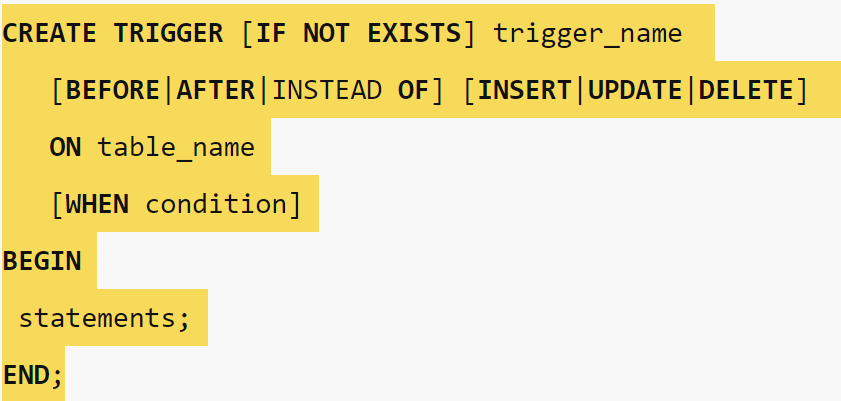

**Reference**
- https://www.sqlitetutorial.net/sqlite-trigger/


In [98]:
%%sql

DROP TRIGGER IF EXISTS default_country_on_insert;
CREATE TRIGGER default_country_on_insert
  AFTER INSERT ON Address
BEGIN
  UPDATE Address 
    SET [country] = 'USA'
  WHERE id = New.id AND New.country IS NULL;
END;

 * sqlite:///projectdb.db
Done.
Done.


[]

In [99]:
%%sql

INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state]) VALUES ('314B', 'Pellentesque Ave', '43526', 'Mankato', 'Hawaii');

 * sqlite:///projectdb.db
1 rows affected.


[]

In [100]:
%%sql

SELECT *
FROM Address
WHERE [street_name] = 'Pellentesque Ave'
;

 * sqlite:///projectdb.db
Done.


id,street_number,street_name,zip_code,city,state,country
3,313,Pellentesque Ave,43526,Mankato,Hawaii,USA
7,314B,Pellentesque Ave,43526,Mankato,Hawaii,USA


In [101]:
%%sql

DROP TRIGGER IF EXISTS validate_zip_code_before_insert;
CREATE TRIGGER validate_zip_code_before_insert
  BEFORE INSERT ON Address
WHEN length(New.zip_code) >= 10
BEGIN
   SELECT RAISE(ABORT, 'Invalid zip/postal code');
END;

 * sqlite:///projectdb.db
Done.
Done.


[]

In [102]:
%%sql

INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state], country) VALUES ('24B', 'Colonade Road', 'This is an invalid zip code', 'Toronto', 'ON', 'CA');

 * sqlite:///projectdb.db


IntegrityError: ignored

In [103]:
%%sql

INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state], country) VALUES ('24B', 'Colonade Road', 'K4E 2E5', 'Toronto', 'ON', 'CA');

 * sqlite:///projectdb.db
1 rows affected.


[]

**Addressing Non-repudiation through UPDATE Triggers**

There are times we need to track events for logging and audit purposes. Triggers do come in handy for such events.


In [104]:
%%sql

DROP TABLE IF EXISTS WorkProjectLogs;
CREATE TABLE WorkProjectLogs (
	id INTEGER PRIMARY KEY,
	old_id int,
	new_id int,
	old_project_name varchar(300),
	new_project_name varchar(300),
	old_address_id int,
	new_address_id int,
	old_date_created date,
	new_date_created date
);

/** Create the trigger to track the update **/
DROP TRIGGER IF EXISTS log_work_project_changes;
CREATE TRIGGER log_work_project_changes
  AFTER UPDATE ON WorkProject
  WHEN old.project_name <> new.project_name OR old.address_id <> new.address_id
  BEGIN
      INSERT INTO WorkProjectLogs
      (
          old_id, 
          new_id, 
          old_project_name, 
          new_project_name, 
          old_address_id, 
          new_address_id, 
          old_date_created, 
          new_date_created
      ) VALUES
      (
          old.id,
          new.id,
          old.project_name,
          new.project_name,
          old.address_id,
          new.address_id,
          old.date_created,
          new.date_created
      );
  END;

 * sqlite:///projectdb.db
Done.
Done.
Done.
Done.


[]

In [105]:
%%sql

SELECT * FROM WorkProject;

 * sqlite:///projectdb.db
Done.


id,project_name,address_id,date_created
1,Evergreen,2,2020-08-02
2,Amber Wave,3,2020-08-02
3,Rolling Table,2,2020-08-02
4,Starflight,5,2020-08-02


In [106]:
%%sql

UPDATE WorkProject
  SET project_name = 'Evergreen (New)',
      address_id = 5
WHERE id = 1;

UPDATE WorkProject
  SET project_name = 'Rolling Table (New)',
      address_id = 3
WHERE id = 1;

 * sqlite:///projectdb.db
1 rows affected.
1 rows affected.


[]

In [107]:
%%sql

SELECT *
FROM WorkProjectLogs;

 * sqlite:///projectdb.db
Done.


id,old_id,new_id,old_project_name,new_project_name,old_address_id,new_address_id,old_date_created,new_date_created
1,1,1,Evergreen,Evergreen (New),2,5,2020-08-02,2020-08-02
2,1,1,Evergreen (New),Rolling Table (New),5,3,2020-08-02,2020-08-02
